In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import tz
import psycopg2
from decimal import *
import matplotlib.dates as mdates

from_zone = tz.gettz('UTC')
to_zone = tz.gettz('Europe/Madrid')

In [23]:
def getInCurrentT(t):
    utc = t.replace(tzinfo=from_zone)
    return utc.astimezone(to_zone)

def generatePandas(tableName):
    d = []
    v = []  
    with psycopg2.connect('dbname=meteo') as conn:
        with conn.cursor() as cur:
            cur.execute('SELECT * FROM '+ tableName + ';')
            a = cur.fetchall()
            for i in a:
                t = getInCurrentT(i[0])
                d.append(str(t))
                v.append(i[1])
    data = {'date': d, 'temp': v}
    df = pd.DataFrame(data, columns=['date', 'temp'])
    df['datetime'] = pd.to_datetime(df['date'])
    df['temperature'] = df['temp'].astype(np.float64)
    df.drop(['date'], axis=1, inplace=True)
    df.drop(['temp'], axis=1, inplace=True)
    return df

In [8]:
sBaseP = generatePandas('sensorbase')
sModiP = generatePandas('sensormodified')
dSens = generatePandas('difference')
print(sBaseP)

                             datetime  temperature
0    2019-11-09 22:05:47.727423+01:00        22.52
1    2019-11-09 22:10:48.048422+01:00        25.43
2    2019-11-09 22:13:07.981441+01:00        24.23
3    2019-11-09 22:18:08.435492+01:00        23.20
4    2019-11-09 22:22:57.387521+01:00        22.94
...                               ...          ...
1727 2019-11-15 23:21:21.712191+01:00        18.00
1728 2019-11-15 23:26:22.011931+01:00        17.98
1729 2019-11-15 23:31:22.311969+01:00        17.97
1730 2019-11-15 23:36:22.591991+01:00        17.97
1731 2019-11-15 23:41:22.932323+01:00        17.95

[1732 rows x 2 columns]


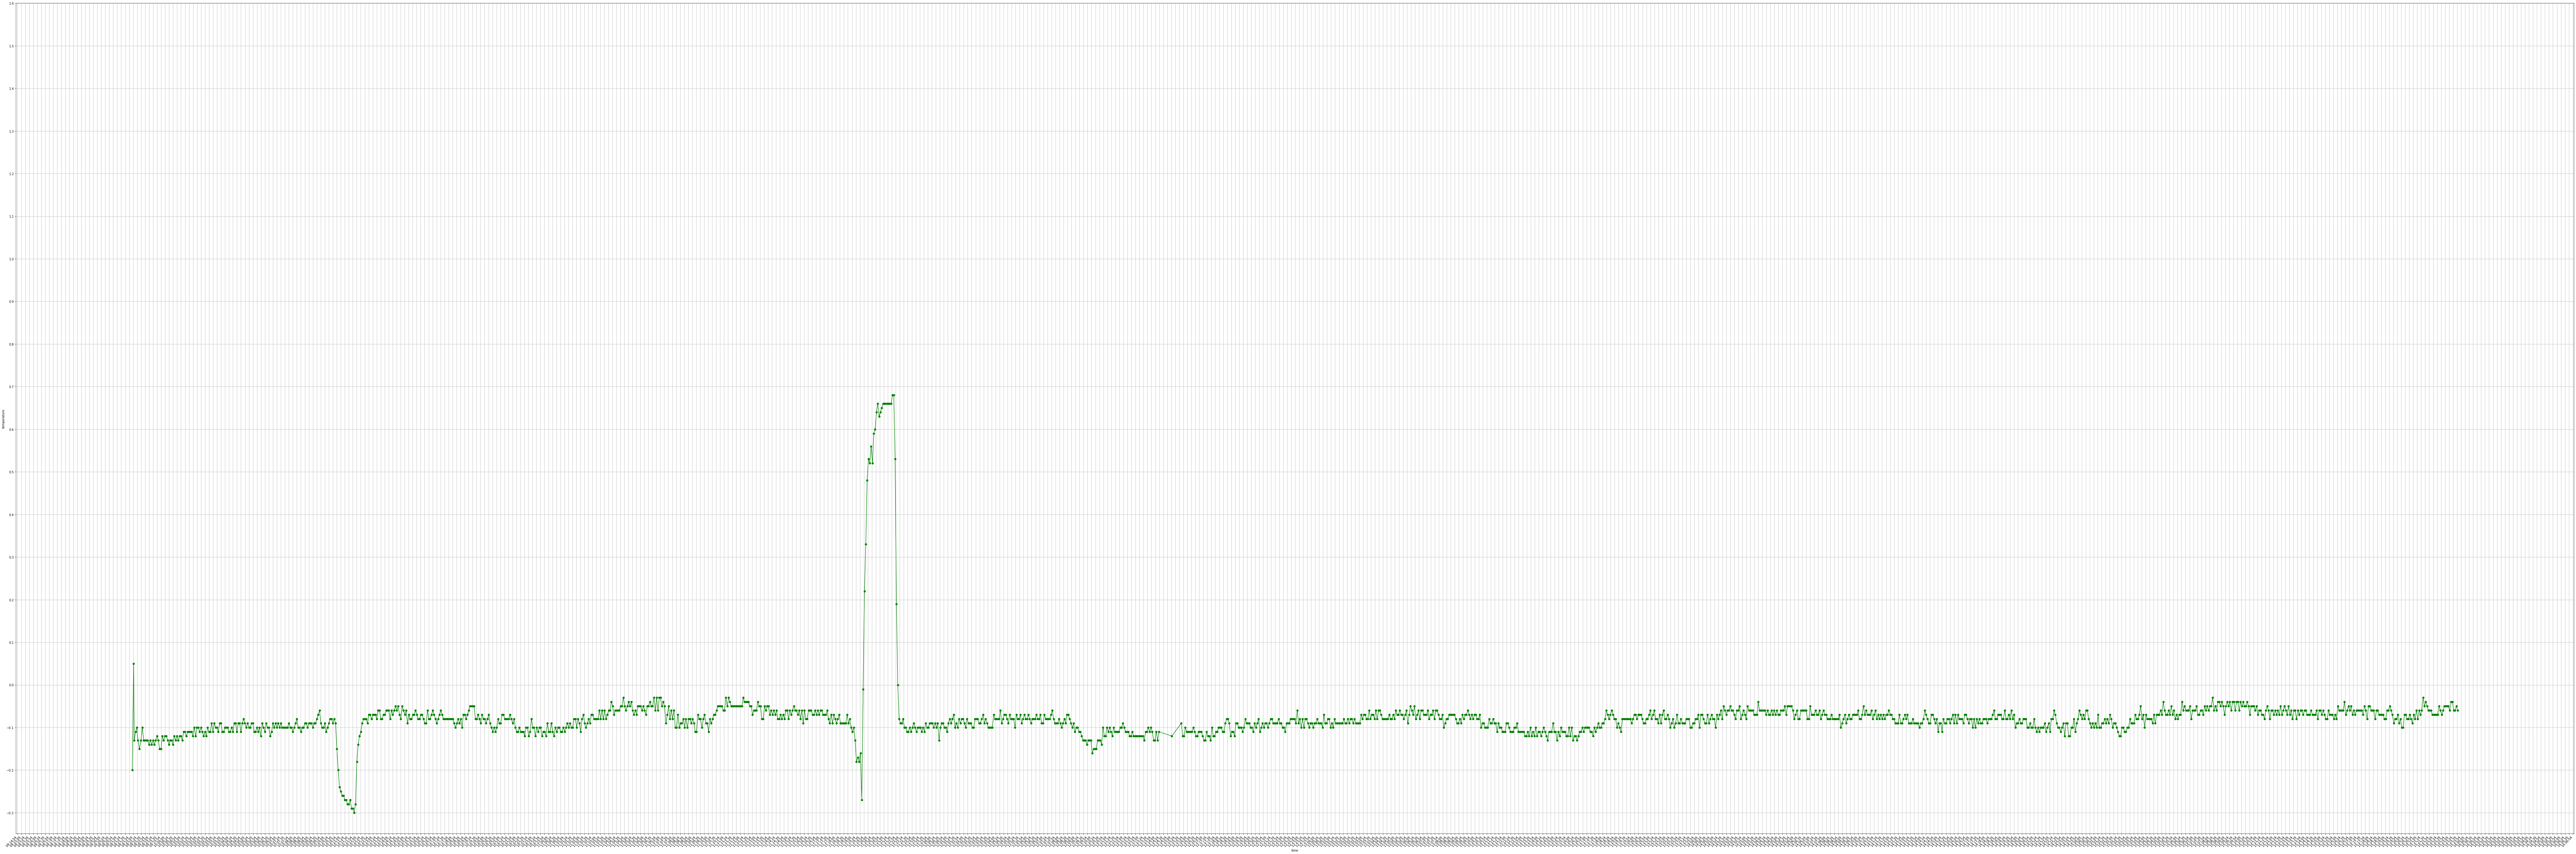

In [19]:
plt.rcParams["figure.figsize"] = (150,50)
fig, ax = plt.subplots()
ax.plot('datetime','temperature', data=dSens, marker='o', color='green')
plt.xlabel('time')
plt.ylabel('temperature')
minT = min(min(dSens['temperature']),min(dSens['temperature']))
maxT = max(max(dSens['temperature']),max(dSens['temperature']))
ax.yaxis.set_ticks(np.arange(minT, maxT+ float(1.0), float(0.1)))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15)) 
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True)
#plt.show()

plt.savefig('diff_'+datetime.now().strftime('%d-%m-%y_%H-%M')+'.png')

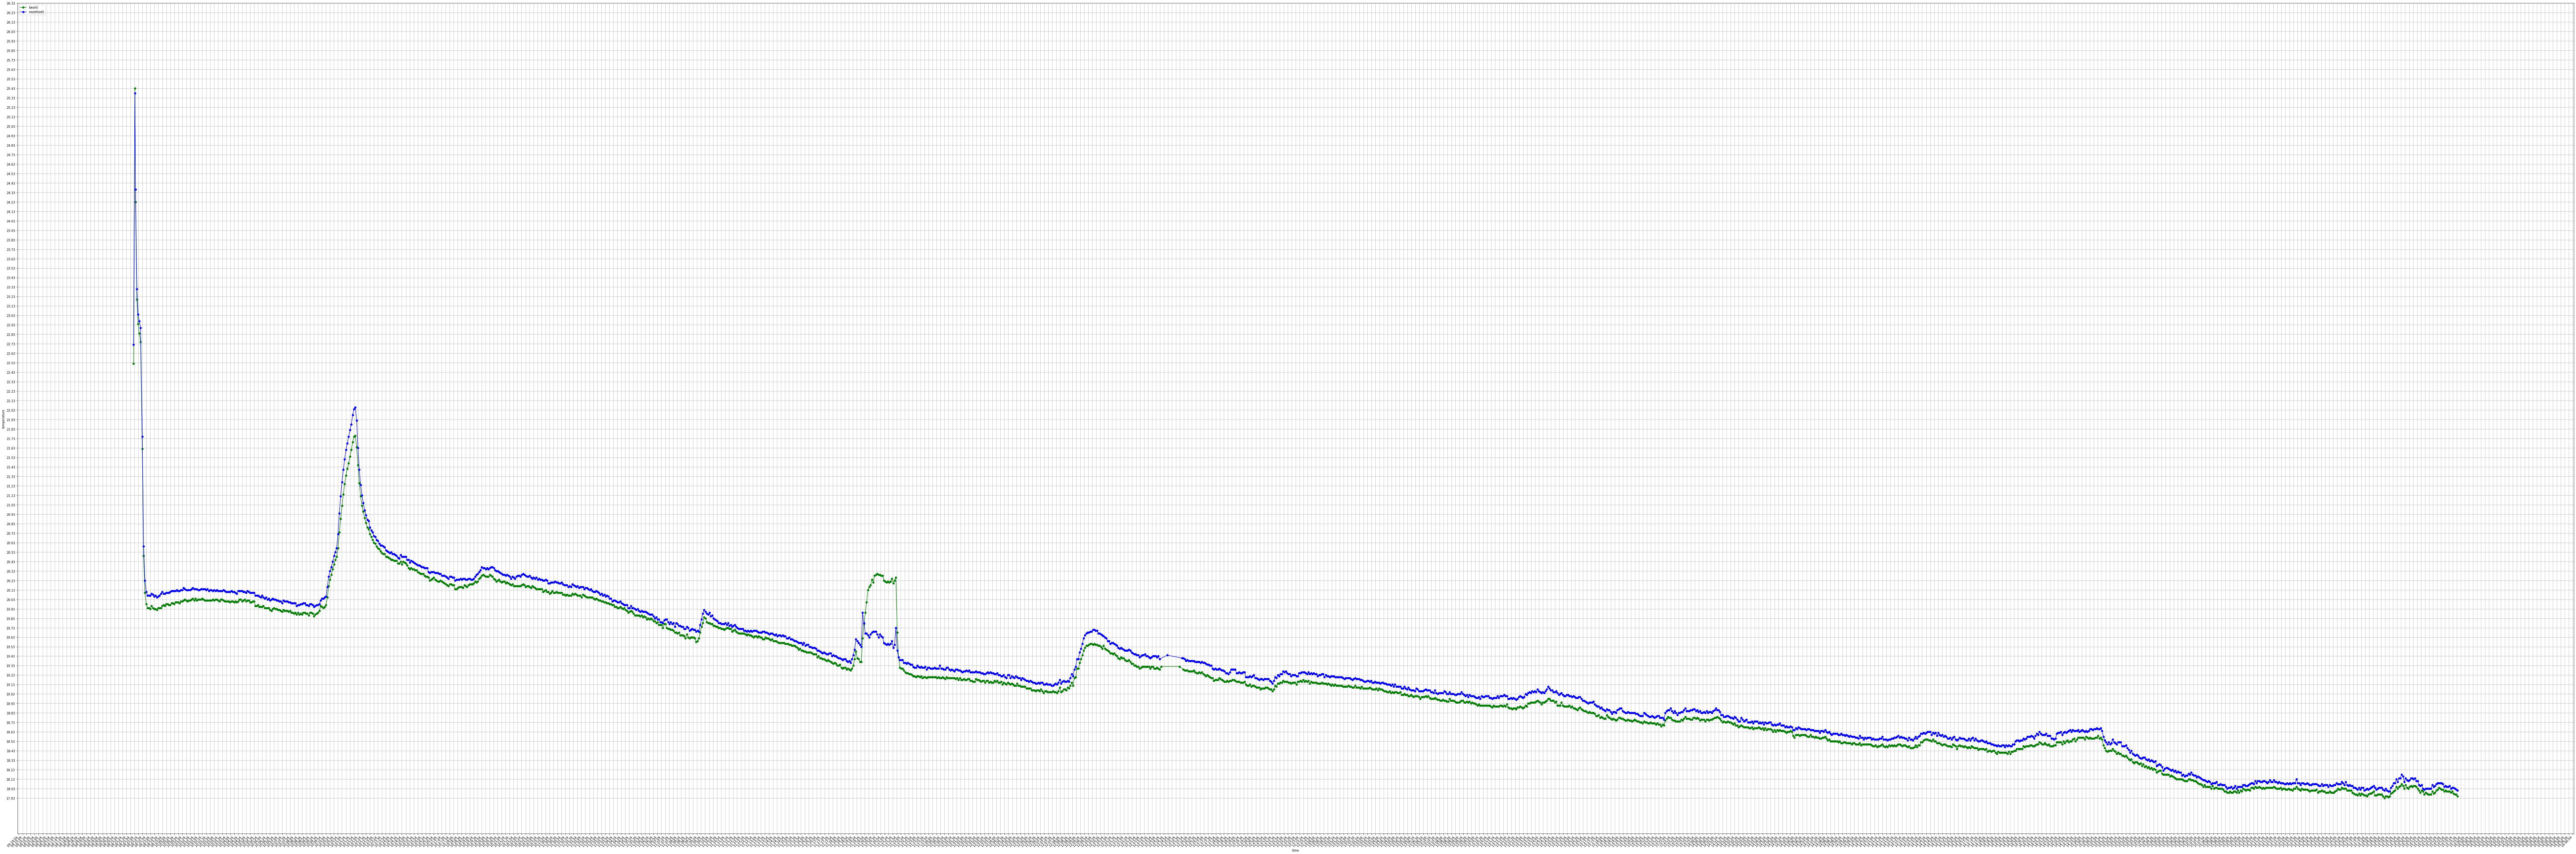

In [20]:
plt.rcParams["figure.figsize"] = (150,50)
fig, ax = plt.subplots()
ax.plot('datetime','temperature', data=sBaseP, marker='o', color='green', label ='baseS')
ax.plot('datetime','temperature', data=sModiP, marker='o', color='blue', label ='modifiedS')
ax.legend(loc='upper left')
plt.xlabel('time')
plt.ylabel('temperature')
minT = min(min(sBaseP['temperature']),min(sModiP['temperature']))
maxT = max(max(sBaseP['temperature']),max(sModiP['temperature']))
ax.yaxis.set_ticks(np.arange(minT, maxT+ float(1.0), float(0.1)))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15)) 
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True)
#plt.show()

plt.savefig('both_'+datetime.now().strftime('%d-%m-%y_%H-%M')+'.png')

In [21]:
dS = generatePandas('difference')
dS.drop(['datetime'], axis=1, inplace=True)
dS['temperature'].value_counts().to_frame('count')

,count
-0.09,256
-0.07,240
-0.08,181
-0.08,149
-0.06,141
-0.11,125
-0.10,115
-0.10,89
-0.05,72
-0.06,71


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6DD501288>]],
      dtype=object)

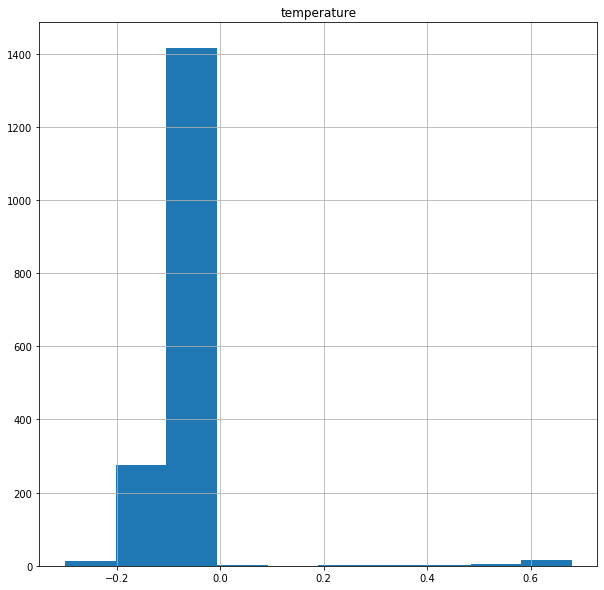

In [22]:
plt.rcParams["figure.figsize"] = (10,10)
dSens.hist()